In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
df = pd.read_csv("bank.csv")
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [2]:
print("Columns in dataset:", df.columns.tolist())
target_col = 'deposit'
print("\nLoan acceptance counts:")
print(df[target_col].value_counts())
df['loan_accept'] = df[target_col].map({'yes':'Yes', 'no':'No'})
print("\nDataset info:")
df.info()
print("\nDataset description (numeric columns):")
df.describe()


Columns in dataset: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'deposit']

Loan acceptance counts:
deposit
no     5873
yes    5289
Name: count, dtype: int64

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          11162 non-null  int64 
 1   job          11162 non-null  object
 2   marital      11162 non-null  object
 3   education    11162 non-null  object
 4   default      11162 non-null  object
 5   balance      11162 non-null  int64 
 6   housing      11162 non-null  object
 7   loan         11162 non-null  object
 8   contact      11162 non-null  object
 9   day          11162 non-null  int64 
 10  month        11162 non-null  object
 11  duration     11162 non-null  int64 
 12  campaign     11162 

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


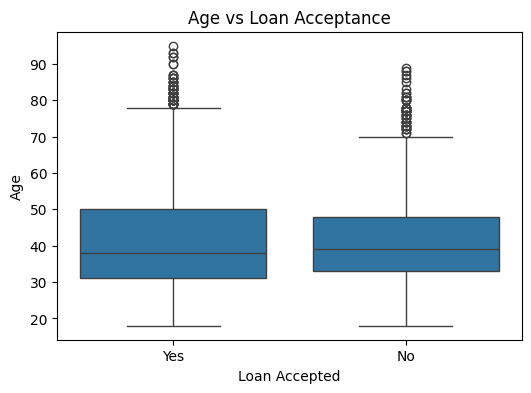

In [3]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['loan_accept'], y=df['age'])
plt.title("Age vs Loan Acceptance")
plt.xlabel("Loan Accepted")
plt.ylabel("Age")
plt.show()


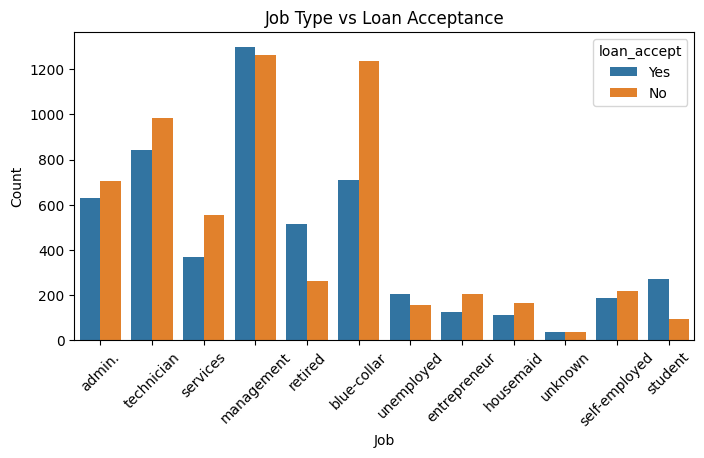

In [4]:
plt.figure(figsize=(8,4))
sns.countplot(x='job', hue='loan_accept', data=df)
plt.xticks(rotation=45)
plt.title("Job Type vs Loan Acceptance")
plt.xlabel("Job")
plt.ylabel("Count")
plt.show()


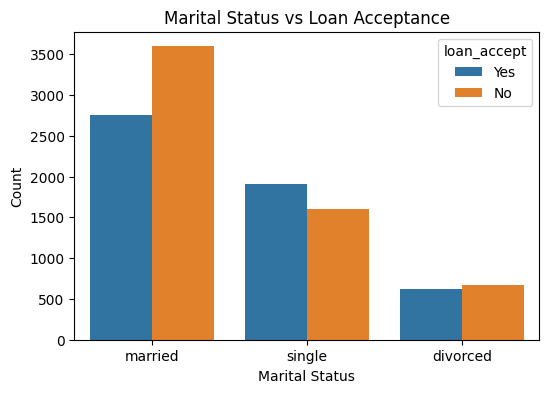

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='marital', hue='loan_accept', data=df)
plt.title("Marital Status vs Loan Acceptance")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()


In [6]:
X = df.drop(['loan_accept', target_col], axis=1)
y = df['loan_accept'].map({'Yes':1, 'No':0})
categorical_cols = X.select_dtypes(include='object').columns
numeric_cols = X.select_dtypes(exclude='object').columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)


In [8]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor_scaled = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_cols),
        ('num', numeric_transformer, numeric_cols)
    ]
)
log_model = Pipeline(steps=[
    ('preprocess', preprocessor_scaled),
    ('clf', LogisticRegression(max_iter=5000, solver='lbfgs'))
])
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8111787889645289
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1450
           1       0.82      0.78      0.80      1341

    accuracy                           0.81      2791
   macro avg       0.81      0.81      0.81      2791
weighted avg       0.81      0.81      0.81      2791



In [9]:
tree_model = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', DecisionTreeClassifier(max_depth=4, random_state=42))
])
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree))


Decision Tree Accuracy: 0.7778573987817986
              precision    recall  f1-score   support

           0       0.83      0.71      0.77      1450
           1       0.73      0.85      0.79      1341

    accuracy                           0.78      2791
   macro avg       0.78      0.78      0.78      2791
weighted avg       0.79      0.78      0.78      2791



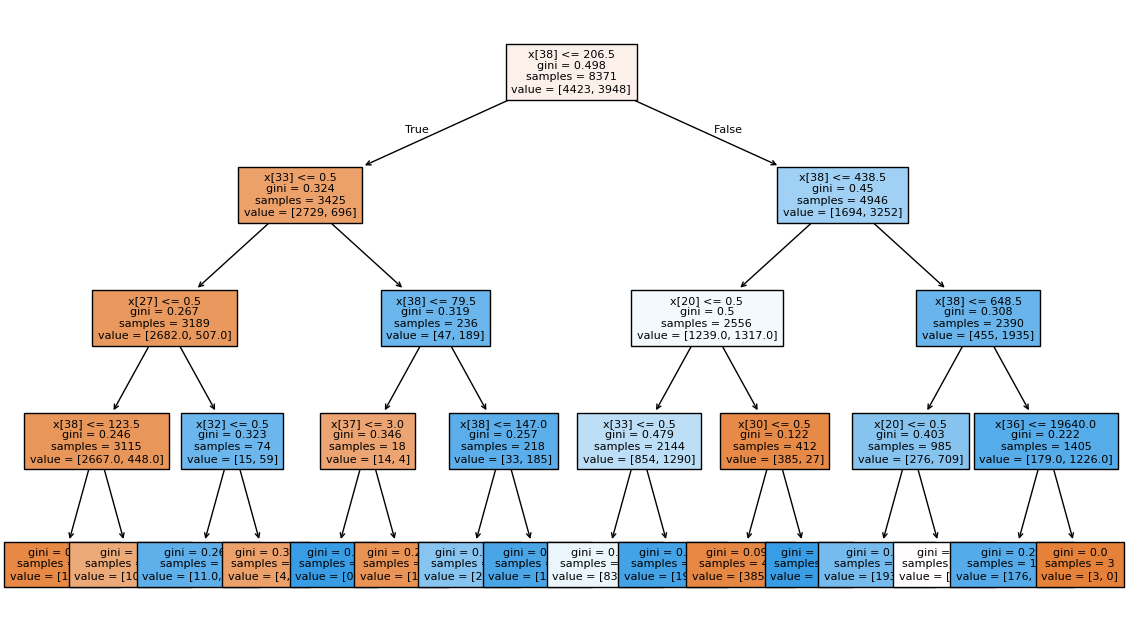

In [10]:
model_step = tree_model.named_steps['clf']

plt.figure(figsize=(14,8))
plot_tree(model_step, filled=True, fontsize=8)
plt.show()


In [11]:
ohe = tree_model.named_steps['preprocess'].named_transformers_['cat']
encoded_cols = ohe.get_feature_names_out(categorical_cols)

feature_names = np.concatenate([encoded_cols, numeric_cols])
importances = model_step.feature_importances_

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp.head(15))


             Feature  Importance
38          duration    0.659225
33  poutcome_success    0.167503
20   contact_unknown    0.125345
27         month_mar    0.035437
30         month_oct    0.006104
36           balance    0.002628
32    poutcome_other    0.002196
37               day    0.001563
35               age    0.000000
34  poutcome_unknown    0.000000
22         month_dec    0.000000
31         month_sep    0.000000
39          campaign    0.000000
29         month_nov    0.000000
28         month_may    0.000000
